#### Import data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn as mg
import seaborn as sns

In [4]:
banana = pd.read_csv("banana  (with class label).csv",header=None,names=['x','y','class'],skiprows=1)
## skiprow=0
banana

,x,y,class
0,0.228,0.559,1
1,0.216,0.528,1
2,0.221,0.552,1
3,0.215,0.538,1
4,0.224,0.548,1
...,...,...,...
4806,0.507,0.269,2
4807,0.526,0.237,2
4808,0.513,0.233,2
4809,0.506,0.221,2


In [5]:
banana.iloc[:,0]

0       0.228
1       0.216
2       0.221
3       0.215
4       0.224
        ...  
4806    0.507
4807    0.526
4808    0.513
4809    0.506
4810    0.515
Name: x, Length: 4811, dtype: float64

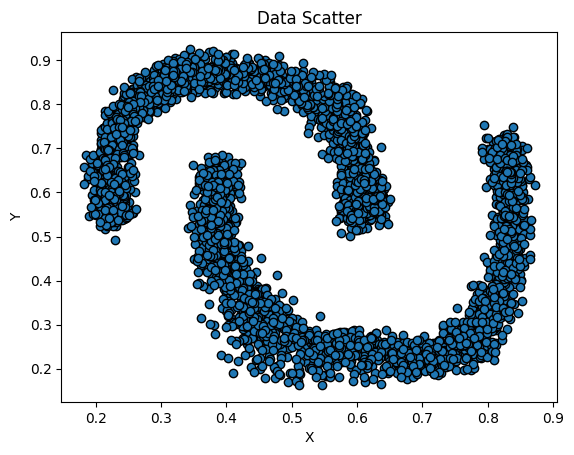

In [6]:
plt.scatter(banana.iloc[:,0], banana.iloc[:,1], edgecolors='k')
plt.title('Data Scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
print(len(banana[banana['x']>1]))
print(len(banana[banana['x']<0]))

0
0


#### Find out Outliers


偏度(Skewness): 0.24, 峰度(Kurtosis): -1.1


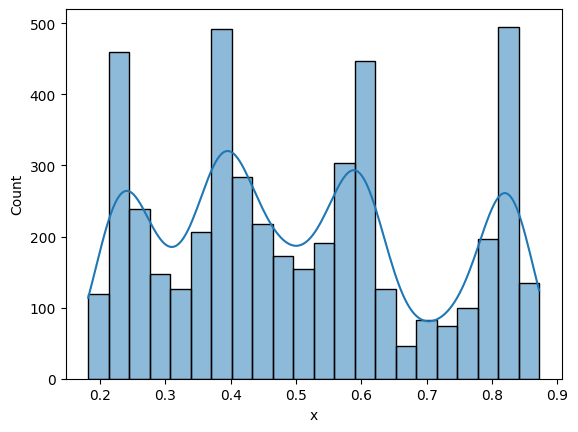

偏度(Skewness): -0.32, 峰度(Kurtosis): -1.07


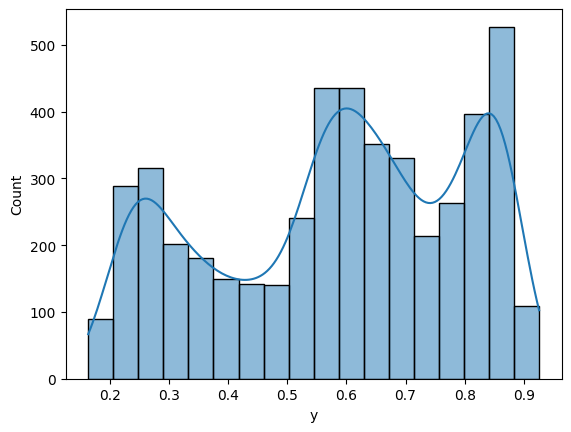

In [8]:
# skewness 與 kurtosis
import seaborn as sns
skewness = round(banana['x'].skew(), 2)
kurtosis = round(banana['x'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(banana['x'], kde=True)
plt.show()

skewness = round(banana['y'].skew(), 2)
kurtosis = round(banana['y'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(banana['y'], kde=True)
plt.show()

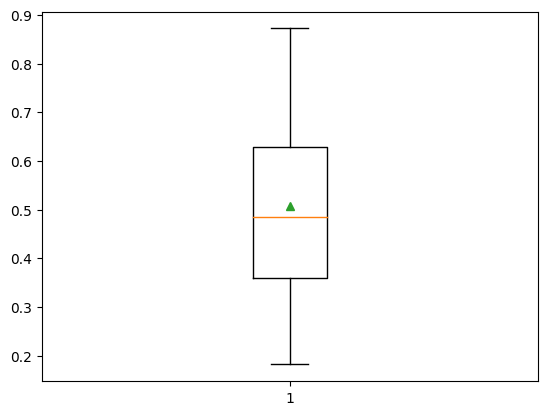

Shape Of The Before Ouliers:  (4811,)
Shape Of The After Ouliers:  (4811,)


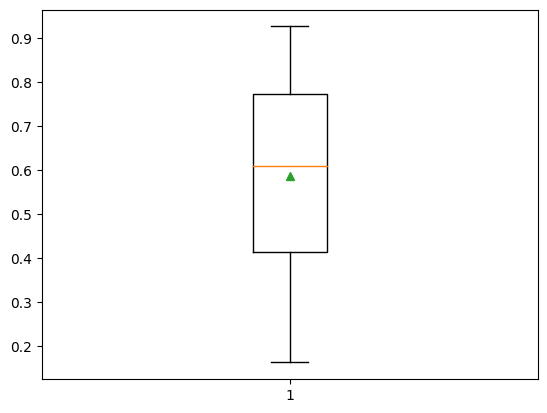

Shape Of The Before Ouliers:  (4811,)
Shape Of The After Ouliers:  (4811,)


In [9]:
# df = pd.DataFrame({'x':[1,2,3,8]})
# #df = pd.DataFrame({'x':[1,2,3,9]})#跑箱型圖可以直接檢視離群值
# print(df['x'].describe())
##boxplot可以很快知道是否有離群值

#箱型圖(用IQR)
plt.boxplot(banana['x'], showmeans=True)
plt.show()

# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
print ("Shape Of The Before Ouliers: ",banana['x'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(banana['x'],75) - np.percentile(banana['x'],25)
# outlier = Q3 + n*IQR 
transform_data=banana[banana['x'] < np.percentile(banana['x'],75)+n*IQR]
# outlier = Q1 - n*IQR 
transform_data=transform_data[transform_data['x'] > np.percentile(transform_data['x'],25)-n*IQR]['x']
print ("Shape Of The After Ouliers: ",transform_data.shape)
#--------------------------------------------------------------------------------------------------------#
plt.boxplot(banana['y'], showmeans=True)
plt.show()

# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
print ("Shape Of The Before Ouliers: ",banana['y'].shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(banana['y'],75) - np.percentile(banana['y'],25)
# outlier = Q3 + n*IQR 
transform_data=banana[banana['y'] < np.percentile(banana['y'],75)+n*IQR]
# outlier = Q1 - n*IQR 
transform_data=transform_data[transform_data['y'] > np.percentile(transform_data['y'],25)-n*IQR]['y']
print ("Shape Of The After Ouliers: ",transform_data.shape)

#### K-means


In [10]:
from sklearn.cluster import KMeans
import time

X=banana.drop('class',axis=1)
## n_cluster: num of cluster/ init: 決定中心點應放在何處/ n_init: 每個Cluster中心點的更新次數/ max_iter: 更新次數的上限值
## tol: 每個Cluster的中心點收斂容忍度，預設為0.0001/ algorithm: K-means又可以再細分許多不同的方法，故在此可以選擇要使用的方式， 如：lloyd、elkan、auto、full
startT = time.time()
model = KMeans(n_clusters=2, n_init='auto')
# 建立模型
model.fit(X)
endT = time.time()

print('K-means執行時間:', round(endT-startT,3),'秒')
print(model.labels_)
print(f'Num of cluster:{np.unique(model.labels_)}')
print(model.cluster_centers_)
centroid = model.cluster_centers_

TypeError: '<=' not supported between instances of 'str' and 'int'

In [ ]:
from scipy.stats import entropy
def cal_entropy(y_true, y_pred):
    #預測的unique值 ex:(兩群) 0、1
    unique_labels = np.unique(y_pred)
    entropies = []
    for label in unique_labels:
        #mask遮罩，讓y_pred選中特定label的資料點
        #(y_pred == label)產生新陣列，如果y_pred陣列與label相同，就True否則False
        #mask = [True,True,True,True,False,False,False,False]
        mask = (y_pred == label)
        cluster_true_labels = y_true[mask]
        #base=2，2的底數計算entropy
        cluster_entropy = entropy(np.bincount(cluster_true_labels), base=2)
        entropies.append(cluster_entropy)

    weights = np.bincount(y_pred) / len(y_pred)
    weights = weights[weights != 0]
    # weights = weights[1:]
    weighted_entropy = np.sum(entropies * weights)

    print(f"權重分配entropy: {weighted_entropy}")

In [ ]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
## Evaluation
from sklearn.metrics import accuracy_score
y_true = banana['class']
y_pred = model.fit_predict(X)
one = [1]*len(y_pred)
y_pred = y_pred+one

print(f'SSE：{model.inertia_}')
print(f'Accuracy：{accuracy_score(y_true,y_pred)}')
cal_entropy(y_true,y_pred)

SSE：185.20301813873283
Accuracy：0.8274786946580752
權重分配entropy: 0.6627080064219228


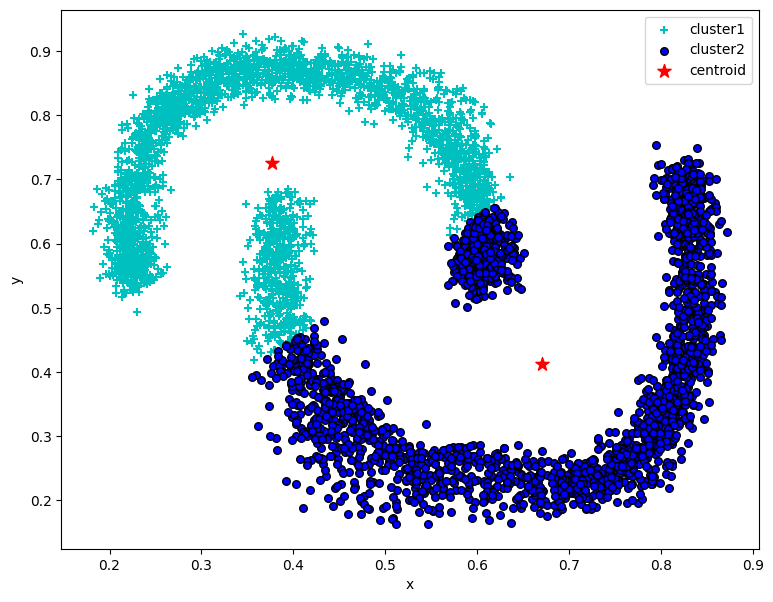

In [ ]:
x0 = X[y_pred == 1]
x1 = X[y_pred == 2]
plt.figure(figsize=(9,7))
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,s=30 ,c='c' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,s=30 ,c='b' ,marker='o' ,edgecolors='k' ,label='cluster2')
plt.scatter(centroid[:,0], centroid[:,1], c='r', s=100, marker='*', label='centroid')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

#### Hierarchical Clustering


In [ ]:
## Scikit Learn
from sklearn.cluster import AgglomerativeClustering
startT = time.time()
agg_model=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='average')
agg_model.fit(X)
print(f'Num of cluster{np.unique(agg_model.labels_)}')
endT = time.time()
print('AgglomerativeClustering執行時間:', round(endT-startT,3))

Num of cluster[0 1]
AgglomerativeClustering執行時間: 0.45


In [ ]:
## Evaluation
y_true = banana['class']
y_pred = agg_model.fit_predict(X)
one = [1]*len(y_pred)
y_pred = y_pred+one

print(f'Accuracy：{accuracy_score(y_true,y_pred)}')
cal_entropy(y_true,y_pred)

Accuracy：0.8168779879442943
權重分配entropy: 0.5834199341722185


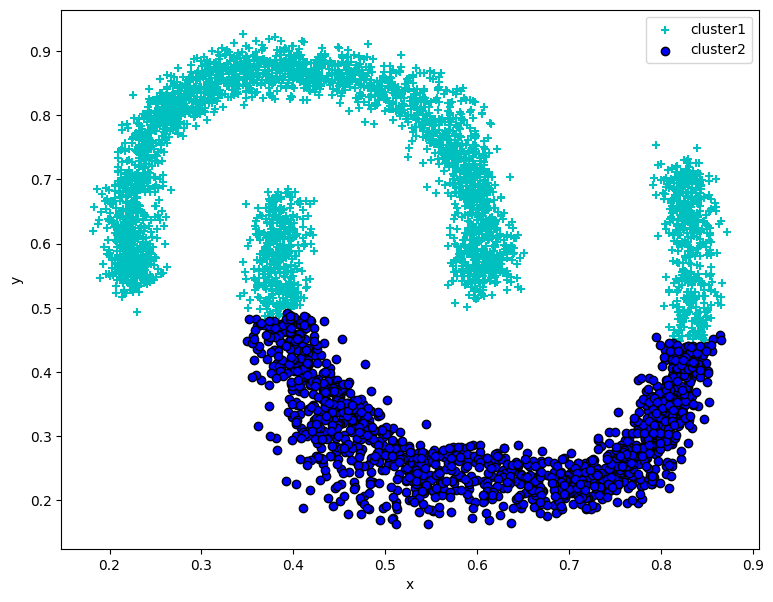

In [ ]:
x0 = X[y_pred == 1]
x1 = X[y_pred == 2]
plt.figure(figsize=(9,7))
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,c='c' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,c='b' ,marker='o' ,edgecolors='k' ,label='cluster2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

執行時間: 8.94


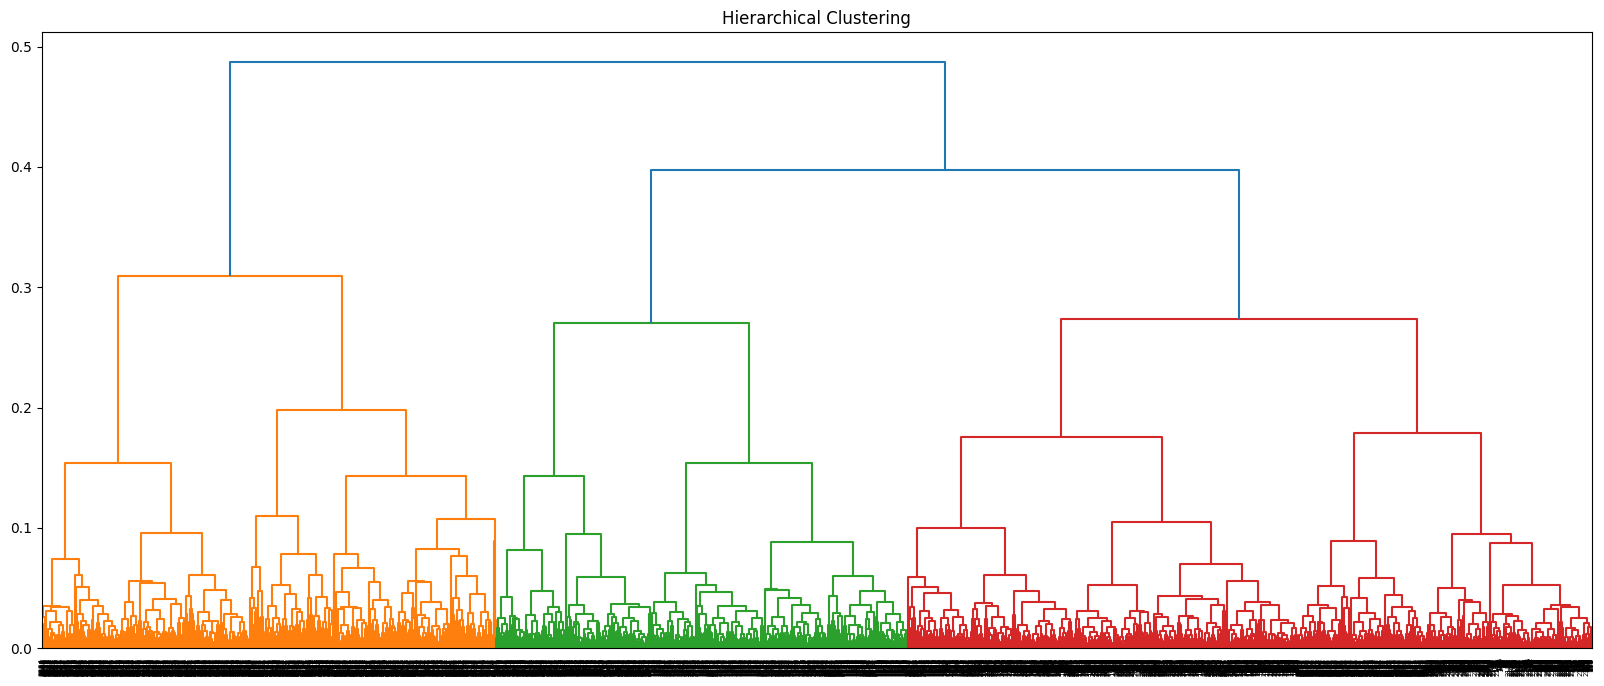

In [ ]:
##  Scipy
import scipy.cluster.hierarchy as sch
startT = time.time()
dis=sch.linkage(X,metric='euclidean',method='average')
plt.figure(figsize=(20,8))

sch.dendrogram(dis,leaf_font_size=5)
endT = time.time()
print('執行時間:', round(endT-startT,3))

plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
max_dis=0.45
clusters=sch.fcluster(dis,max_dis,criterion='distance')


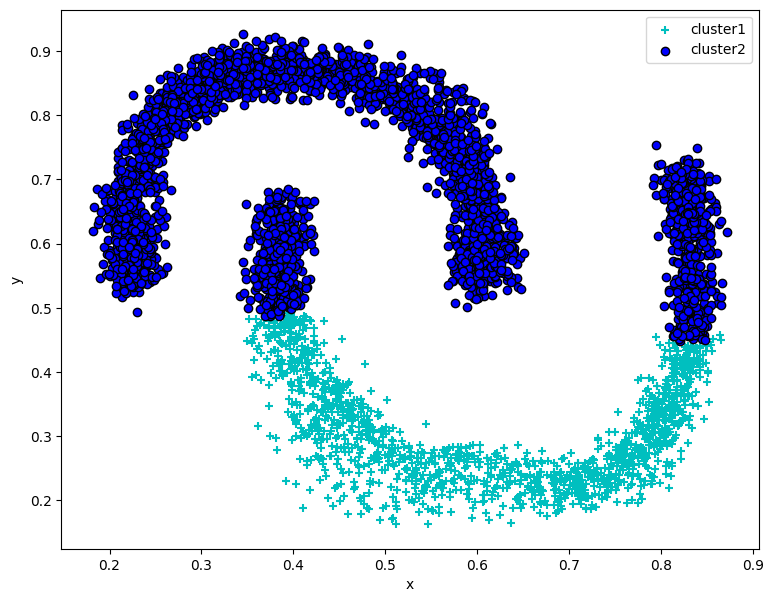

In [ ]:
x0 = X[clusters == 1]
x1 = X[clusters == 2]
plt.figure(figsize=(9,7))
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,c='c' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,c='b' ,marker='o' ,edgecolors='k' ,label='cluster2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

In [ ]:
## Evaluation
y_true = banana['class']
y_pred = clusters

print(f'Accuracy：{accuracy_score(y_true,y_pred)}')
cal_entropy(y_true,y_pred)

Accuracy：0.18312201205570566
權重分配entropy: 0.5834199341722185


#### DBSCAN


In [ ]:
from sklearn.cluster import DBSCAN
import time
startT = time.time()
clustering=DBSCAN(eps=0.022,min_samples=4).fit(X)
endT = time.time()

print('執行時間:', round(endT-startT,2))
print(f'Num of cluster{np.unique(clustering.labels_)}')

執行時間: 0.06
Num of cluster[-1  0  1]


In [ ]:
## Evaluation
y_true = banana['class']
y_pred = clustering.fit_predict(X)
one = [1]*len(y_pred)
y_pred = y_pred+one

print(f'Accuracy：{accuracy_score(y_true,y_pred)}')
cal_entropy(y_true,y_pred)

Accuracy：0.9981292870505093
權重分配entropy: 0.0009414518838039517


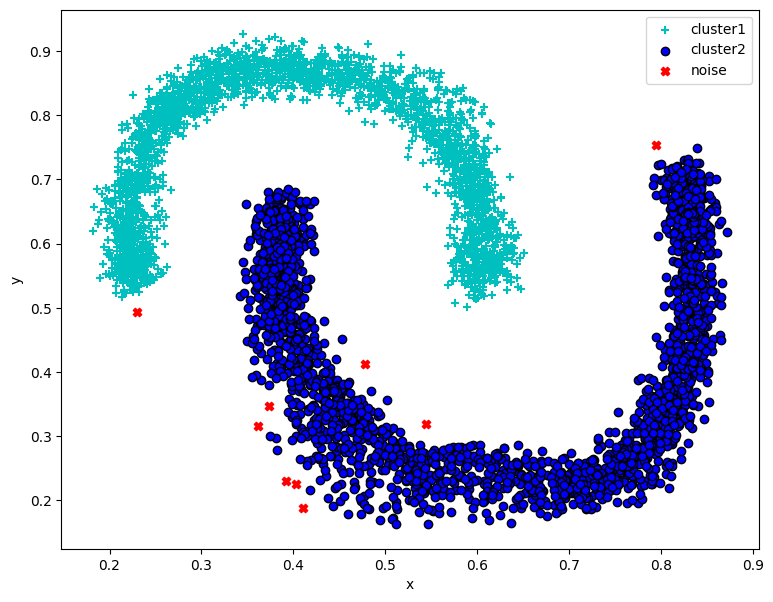

In [ ]:
x0 = X[y_pred == 1]
x1 = X[y_pred == 2]
noise = X[y_pred == 0]
plt.figure(figsize=(9,7))
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,c='c' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,c='b' ,marker='o' ,edgecolors='k' ,label='cluster2')
plt.scatter(noise.iloc[:,0] ,noise.iloc[:,1] ,c='r' ,marker="X" ,label='noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

In [ ]:
print(clustering.get_params)

<bound method BaseEstimator.get_params of DBSCAN(eps=0.022, min_samples=4)>


In [ ]:
from sklearn.neighbors import NearestNeighbors
fig = plt.figure(figsize=(15,15))
for j in range(4,71):

    nearest_neighbors = NearestNeighbors(n_neighbors=j)
    neighbors = nearest_neighbors.fit(banana.values)
    distances, indices = neighbors.kneighbors(banana.values)
    distances = np.sort(distances[:,j-1], axis=0)

    from kneed import KneeLocator 
    i = np.arange(len(distances))

    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    # knee.plot_knee()
    print(f'n={j} eps={distances[knee.knee]}',end=" ")
    # plt.xlabel("Points")
    # plt.ylabel("Distance")
    # plt.title(f'n={j} eps={distances[knee.knee]}')
    # plt.show()

    ## DBSCAN Algorithmn
    clustering=DBSCAN(eps=distances[knee.knee],min_samples=j).fit(X)

    ## Evaluation
    y_true = banana['class']
    y_pred = clustering.fit_predict(X)
    one = [1]*len(y_pred)
    y_pred = y_pred+one

    print(f'Accuracy：{round(accuracy_score(y_true,y_pred),3)}', end=" ")
    cal_entropy(y_true,y_pred)


n=4 eps=0.008602325267042634 Accuracy：0.492 權重分配entropy: 0.06229404893747543
n=5 eps=0.009899494936611674 Accuracy：0.5 權重分配entropy: 0.05328942045814806
n=6 eps=0.010816653826391976 Accuracy：0.504 權重分配entropy: 0.04609099851030134
n=7 eps=0.011704699910719636 Accuracy：0.506 權重分配entropy: 0.042504433562552235
n=8 eps=0.01264911064067351 Accuracy：0.507 權重分配entropy: 0.042504433562552235
n=9 eps=0.01341640786499865 Accuracy：0.509 權重分配entropy: 0.037355345336009135
n=10 eps=0.014142135623730963 Accuracy：0.956 權重分配entropy: 0.03372577521991958
n=11 eps=0.01486606874731852 Accuracy：0.511 權重分配entropy: 0.032421171717072386
n=12 eps=0.01552417469626003 Accuracy：0.958 權重分配entropy: 0.03042261814080046
n=13 eps=0.016124515496597113 Accuracy：0.964 權重分配entropy: 0.025988968622400452
n=14 eps=0.016552945357246864 Accuracy：0.964 權重分配entropy: 0.02926055630080055
n=15 eps=0.017088007490635077 Accuracy：0.964 權重分配entropy: 0.028919569505776635
n=16 eps=0.01769180601295415 Accuracy：0.969 權重分配entropy: 0.02284850220

<Figure size 1500x1500 with 0 Axes>